# Jypyter example

In [15]:
print("testing!") # code cell

testing!


## Code example

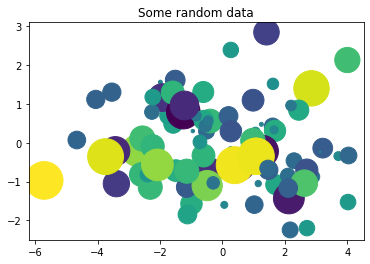

In [16]:
# example from https://jupyter.org/try-jupyter/lab/
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
x = x*2
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data")
plt.show()

Mean of x is: -0.05622127541225264


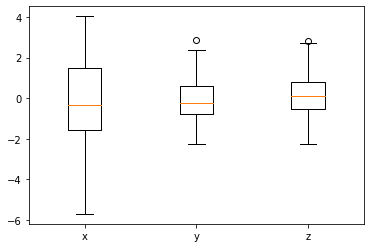

In [20]:
plt.boxplot([x,y,scale], labels = ['x','y','z'])
print(f"Mean of x is: {np.mean(x)}")

## Bash inside jupyter

In [18]:
!ls
working_dir=!pwd
print(working_dir)

README.md            bootcamp.yaml
Simple_Plot.ipynb    simple_example.ipynb
['/Users/asb5975/Bootcamp_2022']


In [19]:
%%timeit -n 1 -r 3
loops = int(1e+6)
x = 0
for i in range(loops):
    x += i**2
print(f"Done! Final i val was {x}")

Done! Final i val was 333332833333500000
Done! Final i val was 333332833333500000
Done! Final i val was 333332833333500000
307 ms ± 26.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [24]:
# https://www.encodeproject.org/files/ENCFF451IKJ/
import os
if not os.path.isfile('./data/ENCFF451IKJ.bigWig'):
    !mkdir -p ./data
    !wget -P ./data https://www.encodeproject.org/files/ENCFF451IKJ/@@download/ENCFF451IKJ.bigWig
else:
    print("file already exists")

file already exists


In [ ]:
infile = "ENCFF451IKJ.bigWig"
outfile = "ENCFF451IKJ.bedgraph"
